### Question: Does the distribution of Internet types follow (70%   20%  10%) for DSL, Cable and Fiber respectively ?

#### Expectations:
 the goal of this question is to provide insights into the distribution of Internet types in a given population or market and to assess whether the expected distribution of 70%, 20%, and 10% for DSL, Cable, and Fiber, respectively, is a reasonable approximation of the actual distribution. This information can be used to inform marketing and product development strategies for specific types of Internet services, and to identify potential areas for improvement in the distribution of Internet types.

#### Note: 
this distribution is not by chance but rather a result of some research that resulted in that DSl internet is the most common as it's affordable then Cable internet then Fiber internet which is the most expensive.

#### Information about the data:
The data is stored in an Excel file named `Telco_customer_churn_service.xlsx`. The file contains 7043 rows. Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The features we are interested in is
`Internet Type`: Type of Internet service (DSL, Fiber optic, None)

### EDA:

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import t

In [11]:
# read the dataset
dataset = pd.read_excel('../Dataset/Telco_customer_churn_services.xlsx')

In [12]:
dataset.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [13]:
# taking only the required column which is Internet Type
dataset = dataset[['Internet Type']]

In [14]:
# checking for null values
dataset.isnull().sum()

Internet Type    0
dtype: int64

In [15]:
dataset.dtypes

Internet Type    object
dtype: object

In [17]:
dataset['Internet Type'].unique()

array(['DSL', 'Fiber Optic', 'Cable', 'None'], dtype=object)

In [18]:
# drop the rows with 'NOne' values
dataset = dataset[dataset['Internet Type'] != 'None']

In [19]:
dataset['Internet Type'].unique()

array(['DSL', 'Fiber Optic', 'Cable'], dtype=object)

<AxesSubplot:xlabel='Internet Type', ylabel='count'>

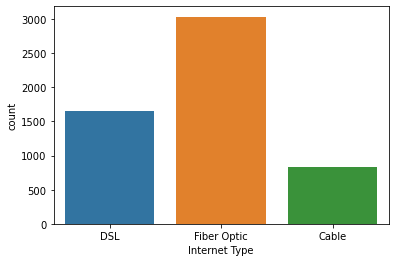

In [20]:
# visualize the distribution of Internet Type
sns.countplot(x='Internet Type', data=dataset)

In [21]:
# separate the Internet Type into 3 categories
dsl = dataset[dataset['Internet Type'] == 'DSL']
fiber = dataset[dataset['Internet Type'] == 'Fiber Optic']
cable = dataset[dataset['Internet Type'] == 'Cable']

#### Initial Insights:
- The data is clean and has no missing values.
- The data has 3 types of internet services: DSL, Fiber optic.
- Fiber Optic is the most common internet service type in the company.

So the distribution of internet types is not as expected. But we need to do some statistical tests to make sure of that.

### Model Building:

#### Define the Hypothesis:
- H0: The distribution of internet types is as expected which is (70%  20%  10%) for (DSL, Cable, Fiber Optic) respectively.
- H1: The distribution of internet types is not as expected.

#### Statistical Test:
- `Chi-Square Goodness Of Fit` Test will be used
- significance level `0.05`

In [22]:
# calculate observed frequencies for each Internet Type
observed = np.array([len(dsl), len(cable), len(fiber)])

# calculate the expected frequencies for each Internet Type
expected = np.array([len(dataset) * 0.7, len(dataset) * 0.2, len(dataset) * 0.1])

# calculate the chi-square statistic
chi_square = np.sum(np.square(observed - expected) / expected)

print('Chi-square statistic: ', chi_square)

Chi-square statistic:  12510.092622802247


In [25]:
# calculate degree of freedom
df = len(observed) - 1

# calculate the critical value
critical_value = t.ppf(0.95, df)

print('Critical value: ', critical_value)

Critical value:  2.919985580355516


In [26]:
# check if the chi-square statistic is greater than the critical value
if chi_square > critical_value:
    print('Reject the null hypothesis')
else:
    print('Accept the null hypothesis')

Reject the null hypothesis


### we managed to reject the null hypothesis and conclude that the Internet Type significantly doesn't follow the distribution of (70% 20% 10%) for (DSL, Cable, Fiber Optic) respectively.